In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns=999 

In [20]:
data = pd.read_csv('iris.data', header = None, names = ["sepal_length","sepal_width", "petal_length","petal_width","species"])

In [21]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [23]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


In [24]:
data = data.dropna()
y = data['species'].values.tolist()
Y = [] #Lable preprocessing
for x in y:
    if x == 'Iris-setosa':
        Y.append(1)
    elif x == 'Iris-versicolor':
        Y.append(2)
    else:
        Y.append(3)

Y = np.asarray(Y)
Y = Y.reshape(rows,1)
X = data.drop(['species'], axis=1).values # Input Feature Values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias


In [25]:
print(Y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


In [28]:
iteration = 10000 #More iterations more learning
alpha = 0.003 # Learning rate
J = np.zeros(iteration) 

In [29]:
def predict(X,b):
    return np.round(np.dot(X, b.T))

In [30]:
def error_func(b, X, Y):
    rows = X.shape[0]
    b -= ((alpha/rows) * np.dot((np.dot(X, b.T) - Y).reshape(1,rows), X))
    return b

In [39]:
def trainn(X, Y):
    np.random.seed(0) 
    b = np.random.randn(1,5) #Random values of beta
    print("b : %s" % (b))
    for i in range(iteration):
        
        J[i] = np.sqrt(sum((predict(X, b) - Y) ** 2) / rows)
        
        error_func(b, X, Y)

    diagram = plt.subplot(111)
    diagram.plot(np.arange(iteration), J)
    #ax.set_ylim([0,0.15])
    plt.ylabel("Cost Values", color="Blue")
    plt.xlabel("Iterations Count", color="Blue")
    plt.title("Root Mean Squared Error vs Iterations alpha(0.003)")
    plt.show()
    return b


b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


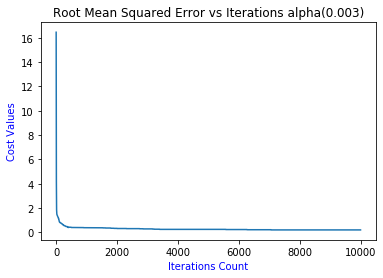

In [41]:
tmp = trainn(X, Y)

In [42]:
prediction = predict(X, tmp)


In [43]:
accuracy = (sum(prediction == Y)/float(len(Y)) * 100)[0]
print("Overall accuracy of the model is %s" % (accuracy))

Overall accuracy of the model is 96.0


In [44]:
data['species'] = Y
data["bias"] = 1
data = data[["bias", "sepal_length","sepal_width", "petal_length","petal_width","species"]]
data.head()

,bias,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,1
1,1,4.9,3.0,1.4,0.2,1
2,1,4.7,3.2,1.3,0.2,1
3,1,4.6,3.1,1.5,0.2,1
4,1,5.0,3.6,1.4,0.2,1


In [45]:
def cross_val(data, k=10):
    data = data.sample(frac=1)
    splits = np.array_split(data, k)
    accuracies = []
    for i in range(len(splits)):
        test = splits[i] # Choosing the 10% data splits as testing
        X_test = test.iloc[:,:-1].values
        class_lables = test.iloc[:,-1].values # Y_test
        class_lables = class_lables.reshape(len(class_lables), 1)
        temp = splits[:]
        temp.pop(i) # Choosing the other 90% data splits as training
        train = pd.concat(temp) #merge all the splits forming training DS
        X_train = train.iloc[:,:-1].values
        Y_train = train.iloc[:,-1].values
        Y_train = Y_train.reshape(len(X_train),1)
        b = trainn(X_train, Y_train)
        # train function returns beta value 
        prediction = predict(X_test, b)
        accuracies.append((sum(prediction == class_lables)/float(len(class_lables)) * 100)[0])
    return accuracies

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


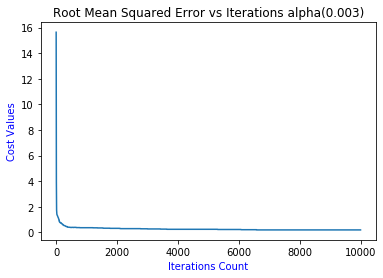

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


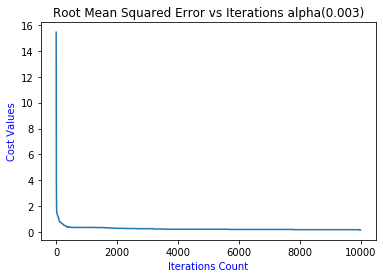

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


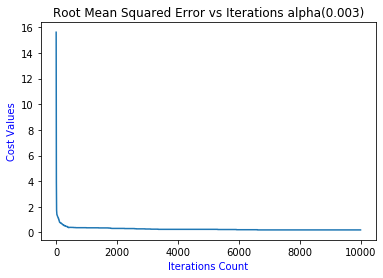

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


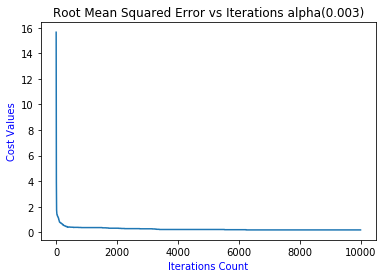

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


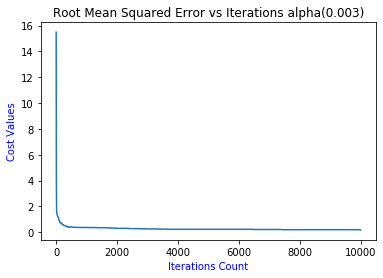

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


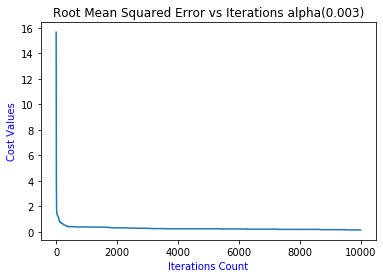

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


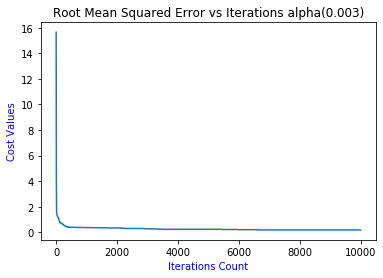

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


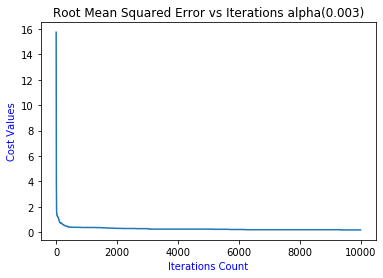

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


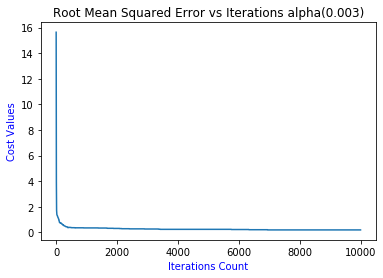

b : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


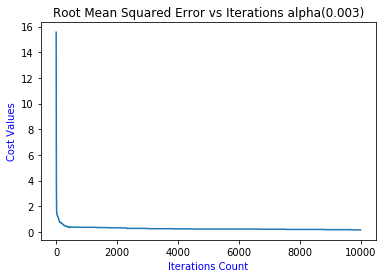

In [46]:
accur = cross_val(data, k=10)

In [47]:
cross_acc = sum(accur)/10 
print("The Cross validation Average accuracy of %s" % (cross_acc))

The Cross validation Average accuracy of 96.0
